In [37]:
%pip install seaborn
%pip install ipykernel
%pip install nbformat==4.2.0


You should consider upgrading via the 'c:\Users\marta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\marta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.8.0
    Uninstalling nbformat-5.8.0:
      Successfully uninstalled nbformat-5.8.0


You should consider upgrading via the 'c:\Users\marta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
# biblioteki
import plotly
import pandas as pd
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle

In [27]:
# wczytanie danych 
df = pd.read_csv("https://raw.githubusercontent.com/vieczorkamil/Spotify_top_songs_EDA/master/data/Spotify%202010%20-%202019%20Top%20100.csv")
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [28]:
# Informacje o typie danych w zestawie
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [29]:
sns.set_style("darkgrid")

15 najpopularniejszych gatunków muzyki na Spotify

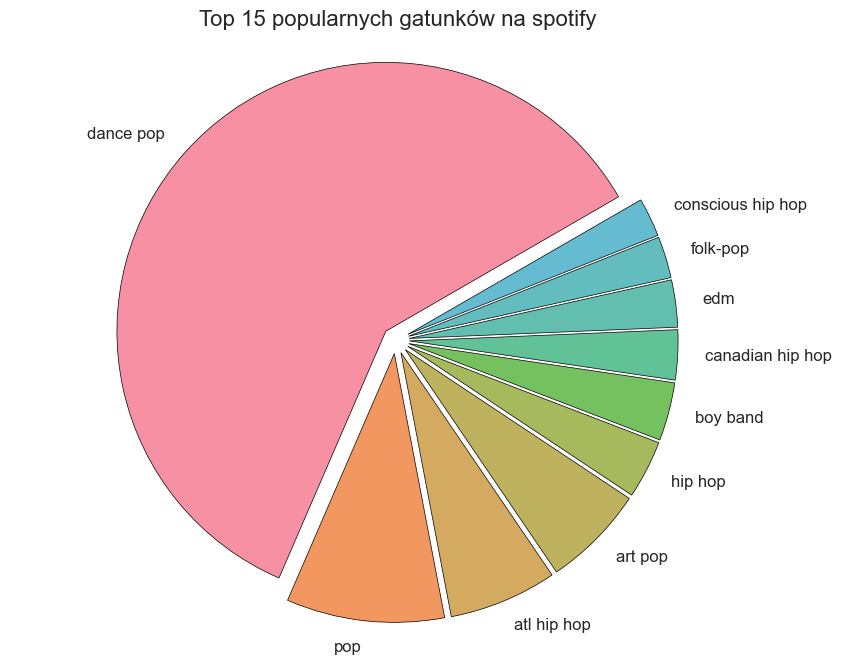

In [173]:
# wybierzmy tylko 10 najlepszych gatunków muzycznych
top_genres = df['top genre'].value_counts().head(10)

# funkcja zwracająca odcień koloru
def get_color(value):
    color = sns.color_palette('husl', 15)[top_genres.index.get_loc(value)]
    return sns.light_palette(color, n_colors=5)[-2]

# tworzenie wykresu kołowego
plt.figure(figsize=(10, 8))
plt.title('Najpopularniejsze gatunki muzyki na spotify', fontsize=16)

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

colors = [get_color(g) for g in top_genres.index]
plt.pie(top_genres, labels=top_genres.index, explode=explode, colors=colors, startangle=30, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

plt.axis('equal')
plt.show()



Analiza ilości wykonawców danego typu w latach 2010-2019



C:\Users\marta\AppData\Local\Temp\ipykernel_25368\1117832403.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



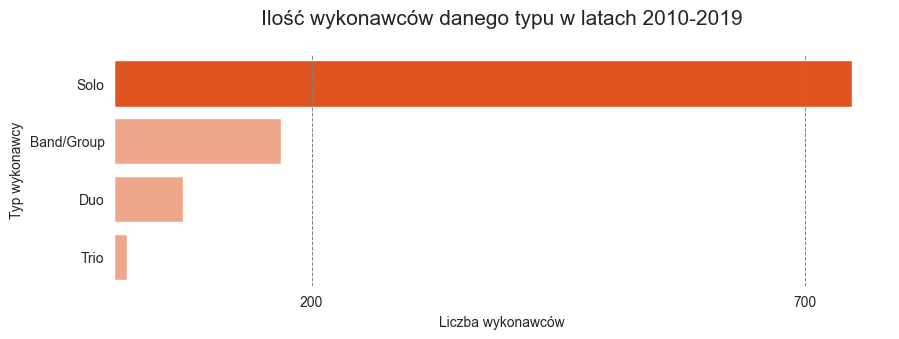

In [176]:
# Analiza typów wykonawców

plt.figure(figsize=(10,3))
plt.title('Ilość wykonawców danego typu w latach 2010-2019\n', fontsize=15)
ax=sns.countplot(data=df, y='artist type', palette=['orangered',"lightsalmon","lightsalmon","lightsalmon"], order=df['artist type'].value_counts().index[:])
# ax=sns.countplot(data=df, y='artist type', order=df['artist type'].value_counts().index[:], palette=sns.color_palette("Blues_r", n_colors=6))
ax.set_facecolor('white')
ax.set_xlabel("Liczba wykonawców")
ax.set_ylabel("Typ wykonawcy")


ax.axvline(x=200, color='gray', linestyle='--', linewidth=0.7)
ax.axvline(x=700, color='gray', linestyle='--', linewidth=0.7)
ax.set_xticklabels([None, None, 200, None, None, None, None, 700, None]);

Udział poszczególnych typów wykonawców (solo, duet, trio, zespół) w latach 2010-2019

In [219]:
#Trzeba odpalić w collab
colors = plotly.colors.qualitative.Bold

grouped = df.groupby(['top year', 'artist type']).size().reset_index(name='counts')


# years = grouped['top year'].value_counts().sort_values()

# top_year = [2010, 2010, 2010, 2011, 2011, 2011, 2012, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019]
sorted_grouped = grouped.sort_values(['top year', 'artist type'])

fig = px.bar(sorted_grouped, x='top year', y='counts',
             color='artist type', barmode='stack',
             color_discrete_sequence=colors)

fig.update_layout(width=1500, height=600, showlegend=False, title='Procentowy udział artystów typu <span style="color:rgb(57, 105, 172)"><b>solo</b></span>,<span style="color:rgb(17, 165, 121)"><b> duo</b></span>, <span style="color:rgb(242, 183, 1)"><b>trio</b></span>, <span style="color:rgb(127, 60, 141)"><b>band/group</b></span> w latach 2010-2019', title_x=0.5, xaxis={'tickmode': 'array',
                         'tickvals': sorted_grouped['top year'].unique()},plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(title_text='Lata')  # Ustawienie etykiety dla osi x
fig.update_yaxes(title_text='Udział [%]')

# Don't forget to remove from update_traces
fig.update_traces(textfont_size=12)



fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Top wykonawcy -> TODO: poprawić wygląd

Tu jest inna wersja tego wykresu co wyżej, bez uwzględnienia gatunku, ale fajnie wygląda

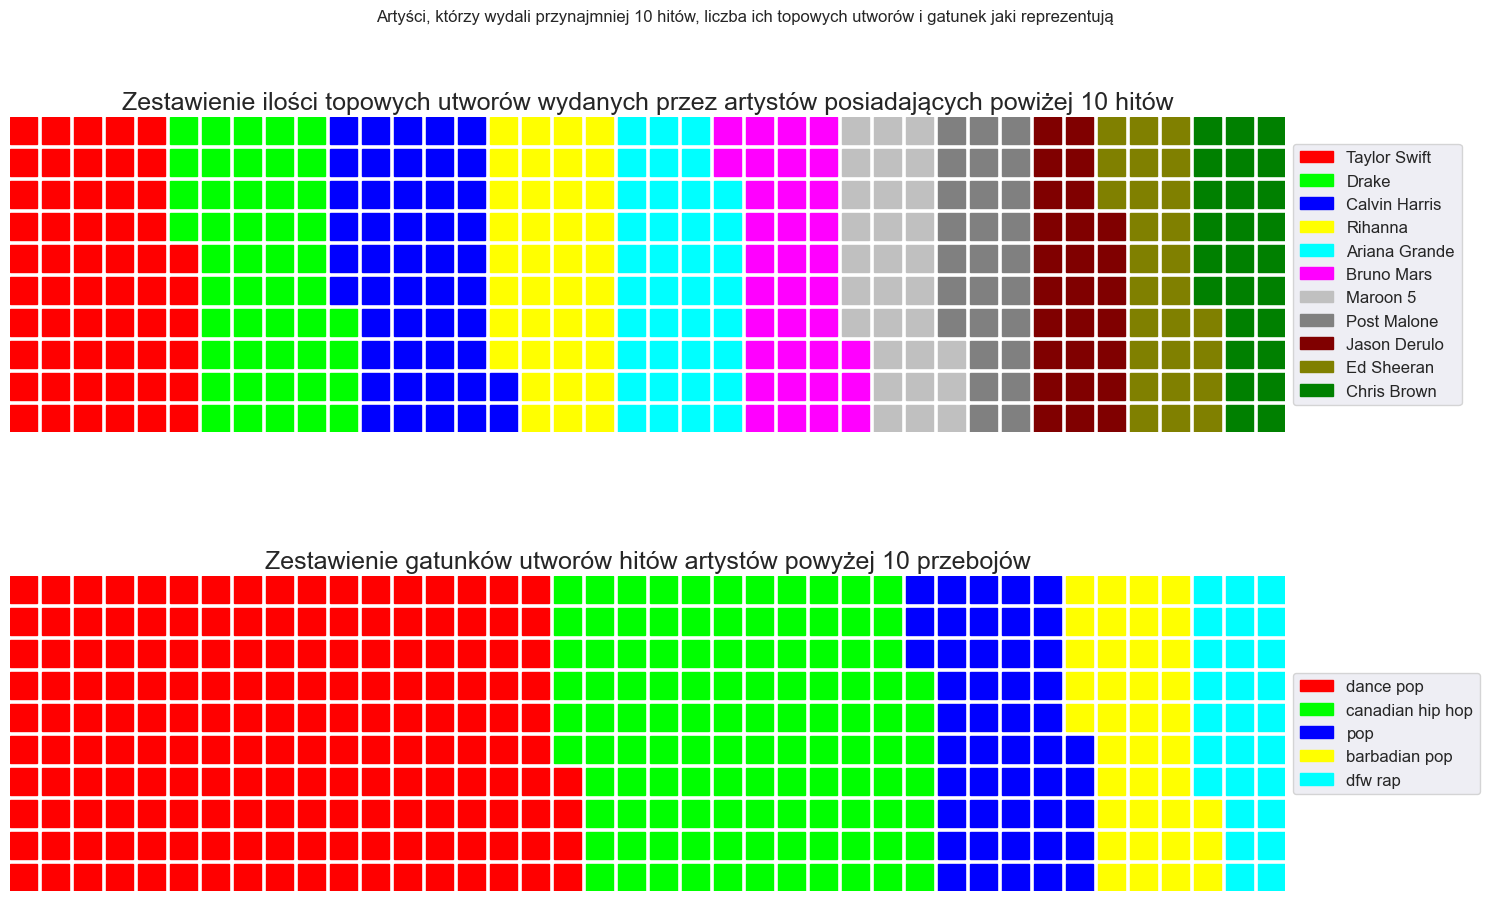

In [205]:
index = df['artist'].value_counts()[df['artist'].value_counts() >= 10].index.tolist()
val = df['artist'].value_counts()[df['artist'].value_counts() >= 10].values.tolist()
genres = df.loc[df['artist'].isin(index), 'top genre'].unique().tolist()
genres_count = df.loc[df['artist'].isin(index), 'top genre'].value_counts()




colors1 = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#C0C0C0', '#808080', '#800000', '#808000', '#008000']
colors2 = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF']
fig = plt.figure(FigureClass=Waffle, 
                 plots = {212: {'values': genres_count,
                               'labels': genres,
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Zestawienie gatunków utworów hitów artystów powyżej 10 przebojów', 'fontsize':18},
                              'colors': colors2
                               },
                         211: {'values': val,
                               'labels': index,
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Zestawienie ilości topowych utworów wydanych przez artystów posiadających powiżej 10 hitów', 'fontsize':18},
                               'colors': colors1
                               },
                               
                          },
                 figsize=(15,10), 
                 rows=10, 
                 columns = 40, 
                 
)
                 
fig.suptitle('Artyści, którzy wydali przynajmniej 10 hitów, liczba ich topowych utworów i gatunek jaki reprezentują')

plt.tight_layout()
plt.show()

TU FAJNY POMYSŁ NA WYKRES ANE W KOŁOWYM OBRACAJĄ SIĘ ETYKIETY WIEC NIE MOŻE BYĆ TODO: POPRAWIĆ WYGLĄD LUB ZMIENIĆ TYP WYKRESU

Rozkład tempa piosenek (bpm)

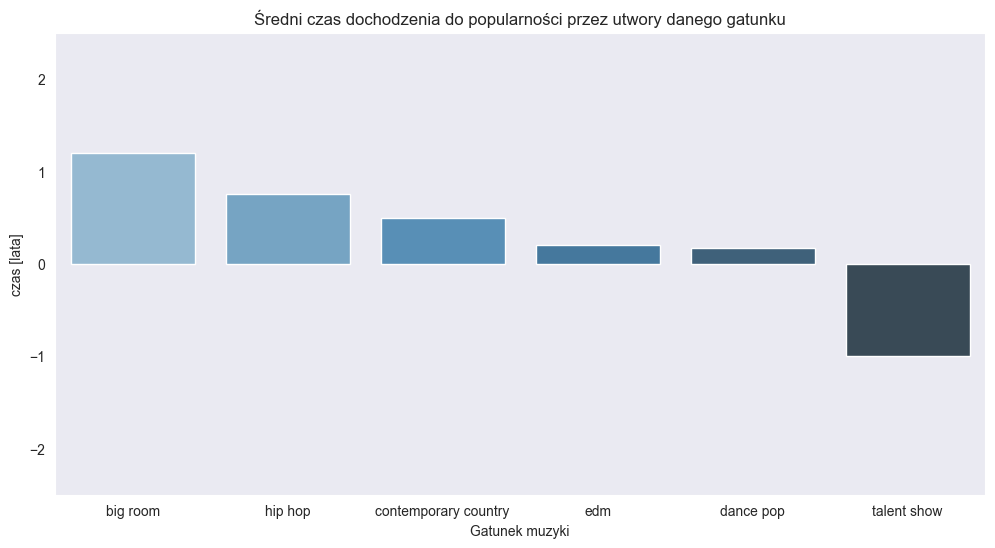

In [172]:
df['czas_dochodzenia_do_popularnosci'] = df['top year'] - df['year released']
df_nonzero = df.loc[df['czas_dochodzenia_do_popularnosci'] != 0]
# df_nonzero = df_nonzero.loc[df_nonzero['top genre'].isin(['hip hop', 'classic rock', 'dance pop', 'big room', 'r&b', 'contemporary country', 'talent show', 'edm'])]


df_nonzero = df_nonzero.loc[df_nonzero['top genre'].isin(['hip hop', 'dance pop', 'big room', 'r&b', 'contemporary country', 'talent show', 'edm'])]


# przygotowanie danych do wykresu
df_plot = df_nonzero.groupby('top genre')['czas_dochodzenia_do_popularnosci'].mean().reset_index()
df_sorted = df_plot.sort_values(by='czas_dochodzenia_do_popularnosci', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=df_sorted, x='top genre', y='czas_dochodzenia_do_popularnosci', palette='Blues_d')
plt.xlabel('Gatunek muzyki')
plt.ylabel('czas [lata]')
plt.title('Średni czas dochodzenia do popularności przez utwory danego gatunku')

plt.grid(False)
plt.ylim(-2.5,2.5)

# plt.ylim(-12,40)
plt.show()


WYDAJE MI SIĘ ŻE JEST GIT

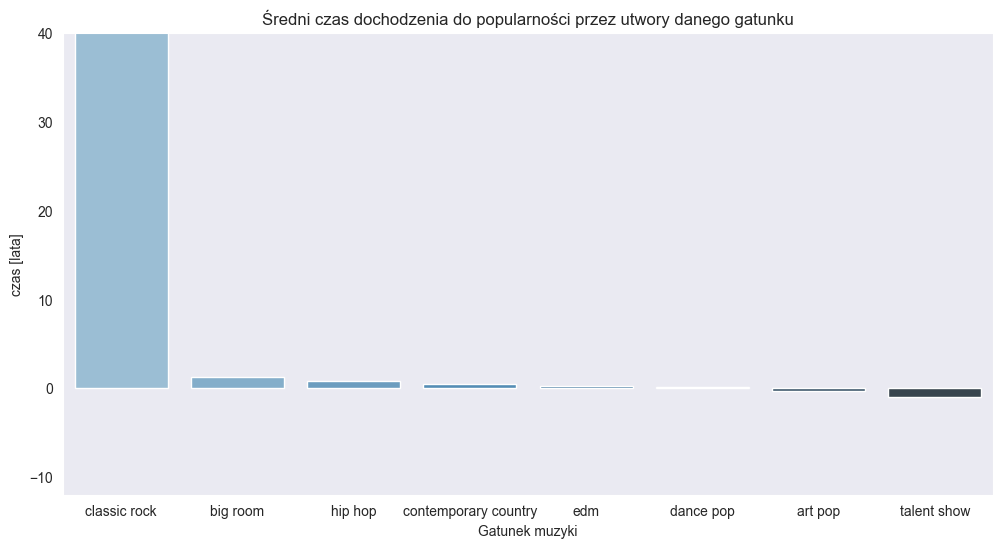

In [213]:
df['czas_dochodzenia_do_popularnosci'] = df['top year'] - df['year released']
df_nonzero = df.loc[df['czas_dochodzenia_do_popularnosci'] != 0]
df_nonzero = df_nonzero.loc[df_nonzero['top genre'].isin(['hip hop', 'classic rock', 'dance pop', 'big room', 'r&b', 'contemporary country', 'talent show', 'edm', 'art pop'])]


# df_nonzero = df_nonzero.loc[df_nonzero['top genre'].isin(['hip hop', 'dance pop', 'big room', 'r&b', 'contemporary country', 'talent show', 'edm'])]


# przygotowanie danych do wykresu
df_plot = df_nonzero.groupby('top genre')['czas_dochodzenia_do_popularnosci'].mean().reset_index()
df_sorted = df_plot.sort_values(by='czas_dochodzenia_do_popularnosci', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=df_sorted, x='top genre', y='czas_dochodzenia_do_popularnosci', palette='Blues_d')
plt.xlabel('Gatunek muzyki')
plt.ylabel('czas [lata]')
plt.title('Średni czas dochodzenia do popularności przez utwory danego gatunku')

plt.grid(False)
# plt.ylim(-2.5,2.5)

plt.ylim(-12,40)
plt.show()


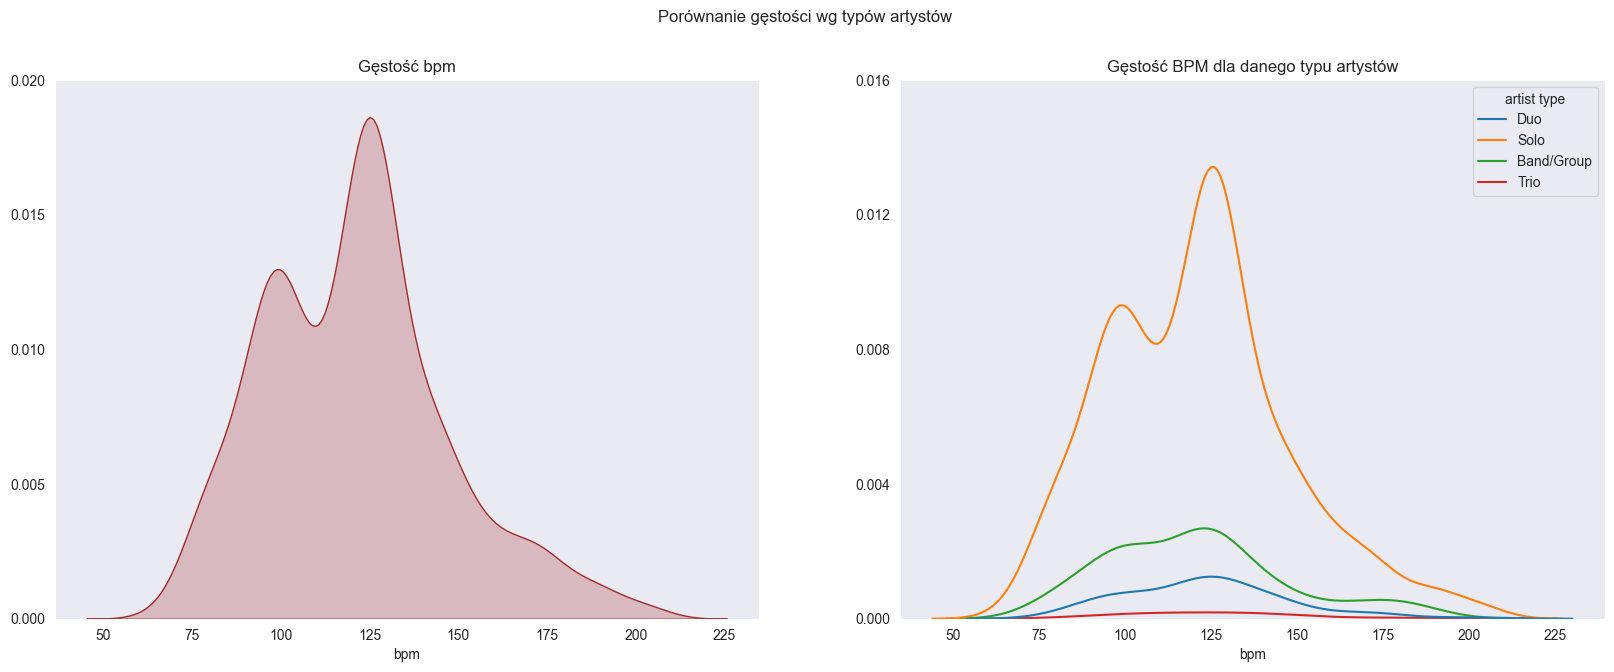

In [214]:
# subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# pierwszy wykres
sns.kdeplot(df['bpm'], color='brown', fill=True, ax=axs[0])
axs[0].set_title('Gęstość bpm')
axs[0].grid(False)
axs[0].set_yticks([0,0.005,0.01,0.015,0.02])
axs[0].set_ylabel("")
# drugi wykres
sns.kdeplot(x="bpm", hue="artist type", data=df, ax=axs[1])
axs[1].set_title('Gęstość BPM dla danego typu artystów')
axs[1].grid(False)
axs[1].set_yticks([0,0.004,0.008,0.012,0.016])
axs[1].set_ylabel("")
fig.suptitle('Porównanie gęstości wg typów artystów')

# wyświetlamy wykres
plt.show()

Nastrój piosenek w zależności od różnych piosenek (rozkład)

WYDAJE SIĘ BYĆ GIT

In [84]:
# Zamiana wartości w kolumnie 'val'
df['mood'] = df['val'].apply(lambda x: 1 if x >= 45 else 0)

# Wyświetlenie pierwszych pięciu wierszy zestawu danych
df['mood'].value_counts()[1]

596

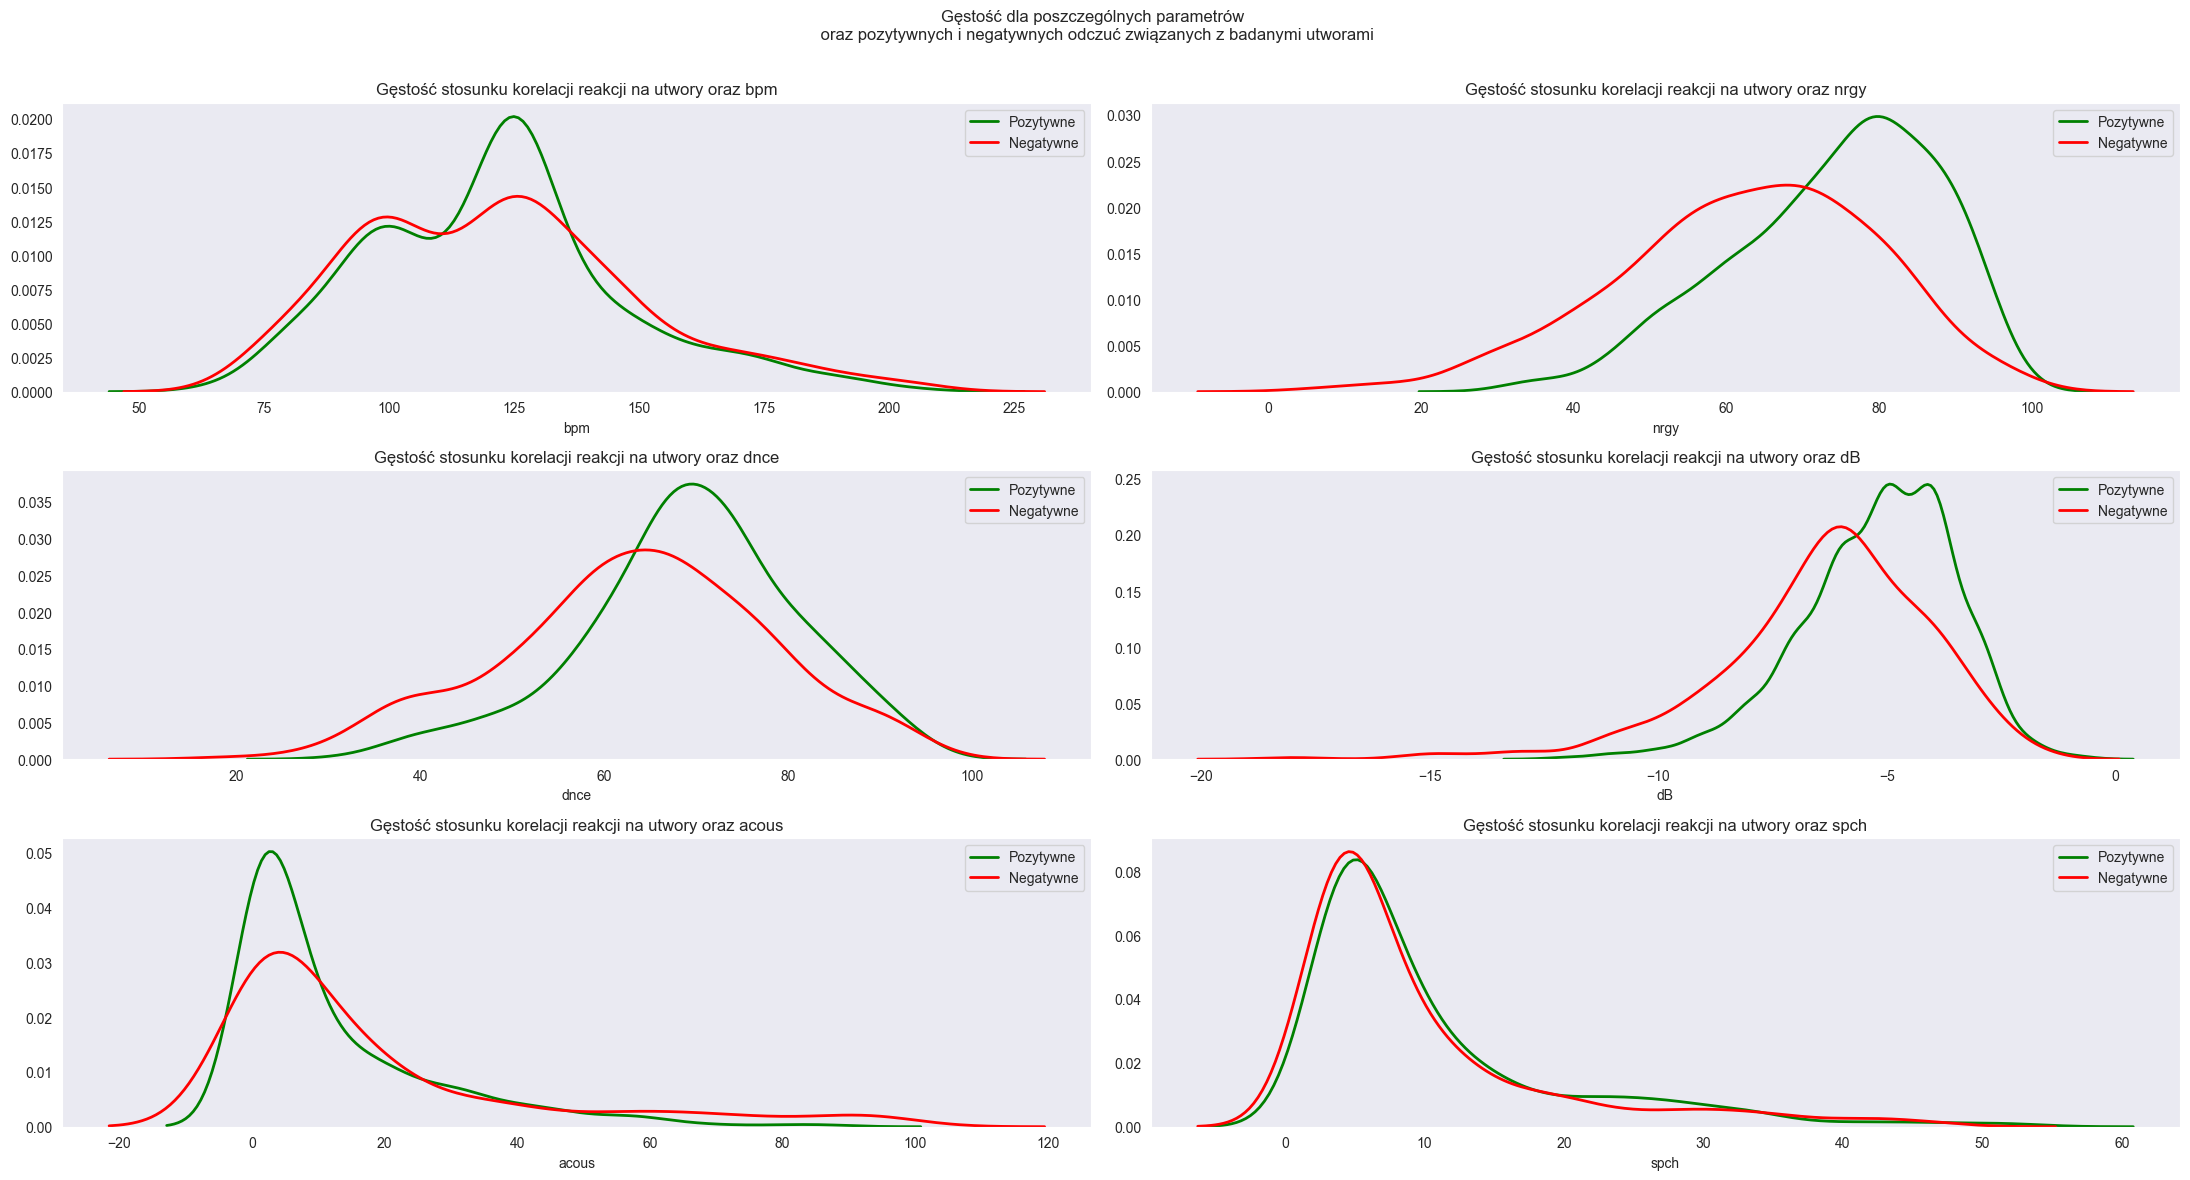

In [113]:
# Zdefiniowanie kolumn zainteresowania
interest_feature_cols = ["bpm", "nrgy", "dnce", "dB", "acous", "spch"]


# Tworzenie siatki subplotów 2x3
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 12))

fig.suptitle(f'Gęstość dla poszczególnych parametrów \n oraz pozytywnych i negatywnych odczuć związanych z badanymi utworami\n\n')
# Iteracja po każdym elemencie siatki subplotów
for idx, ax in enumerate(axes.flatten()):

    # Wybieranie kolumny zainteresowania
    feature_col = interest_feature_cols[idx]
    
    # Wyodrębnianie danych pozytywnych i negatywnych
    pos_data = df[df["mood"] == 1][feature_col]
    neg_data = df[df["mood"] == 0][feature_col]

    # Rysowanie histogramów z linią gęstości dla danych pozytywnych i negatywnych na konkretnym subplotie
    sns.kdeplot(pos_data, color="green", linewidth=2, ax=ax)
    sns.kdeplot(neg_data, color="red", linewidth=2, ax=ax)
    # Dodawanie tytułu i legendy do konkretnego subplotu

    ax.set_title(f"Gęstość stosunku korelacji reakcji na utwory oraz {feature_col}")
    # ax.legend(loc="upper right")
    ax.set_ylabel("")
    ax.grid(False)
    labels = ['Pozytywne', 'Negatywne']
    ax.legend(labels=labels)
    
# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Głośność piosenki a jej taneczność ->dB/danceability TODO: 

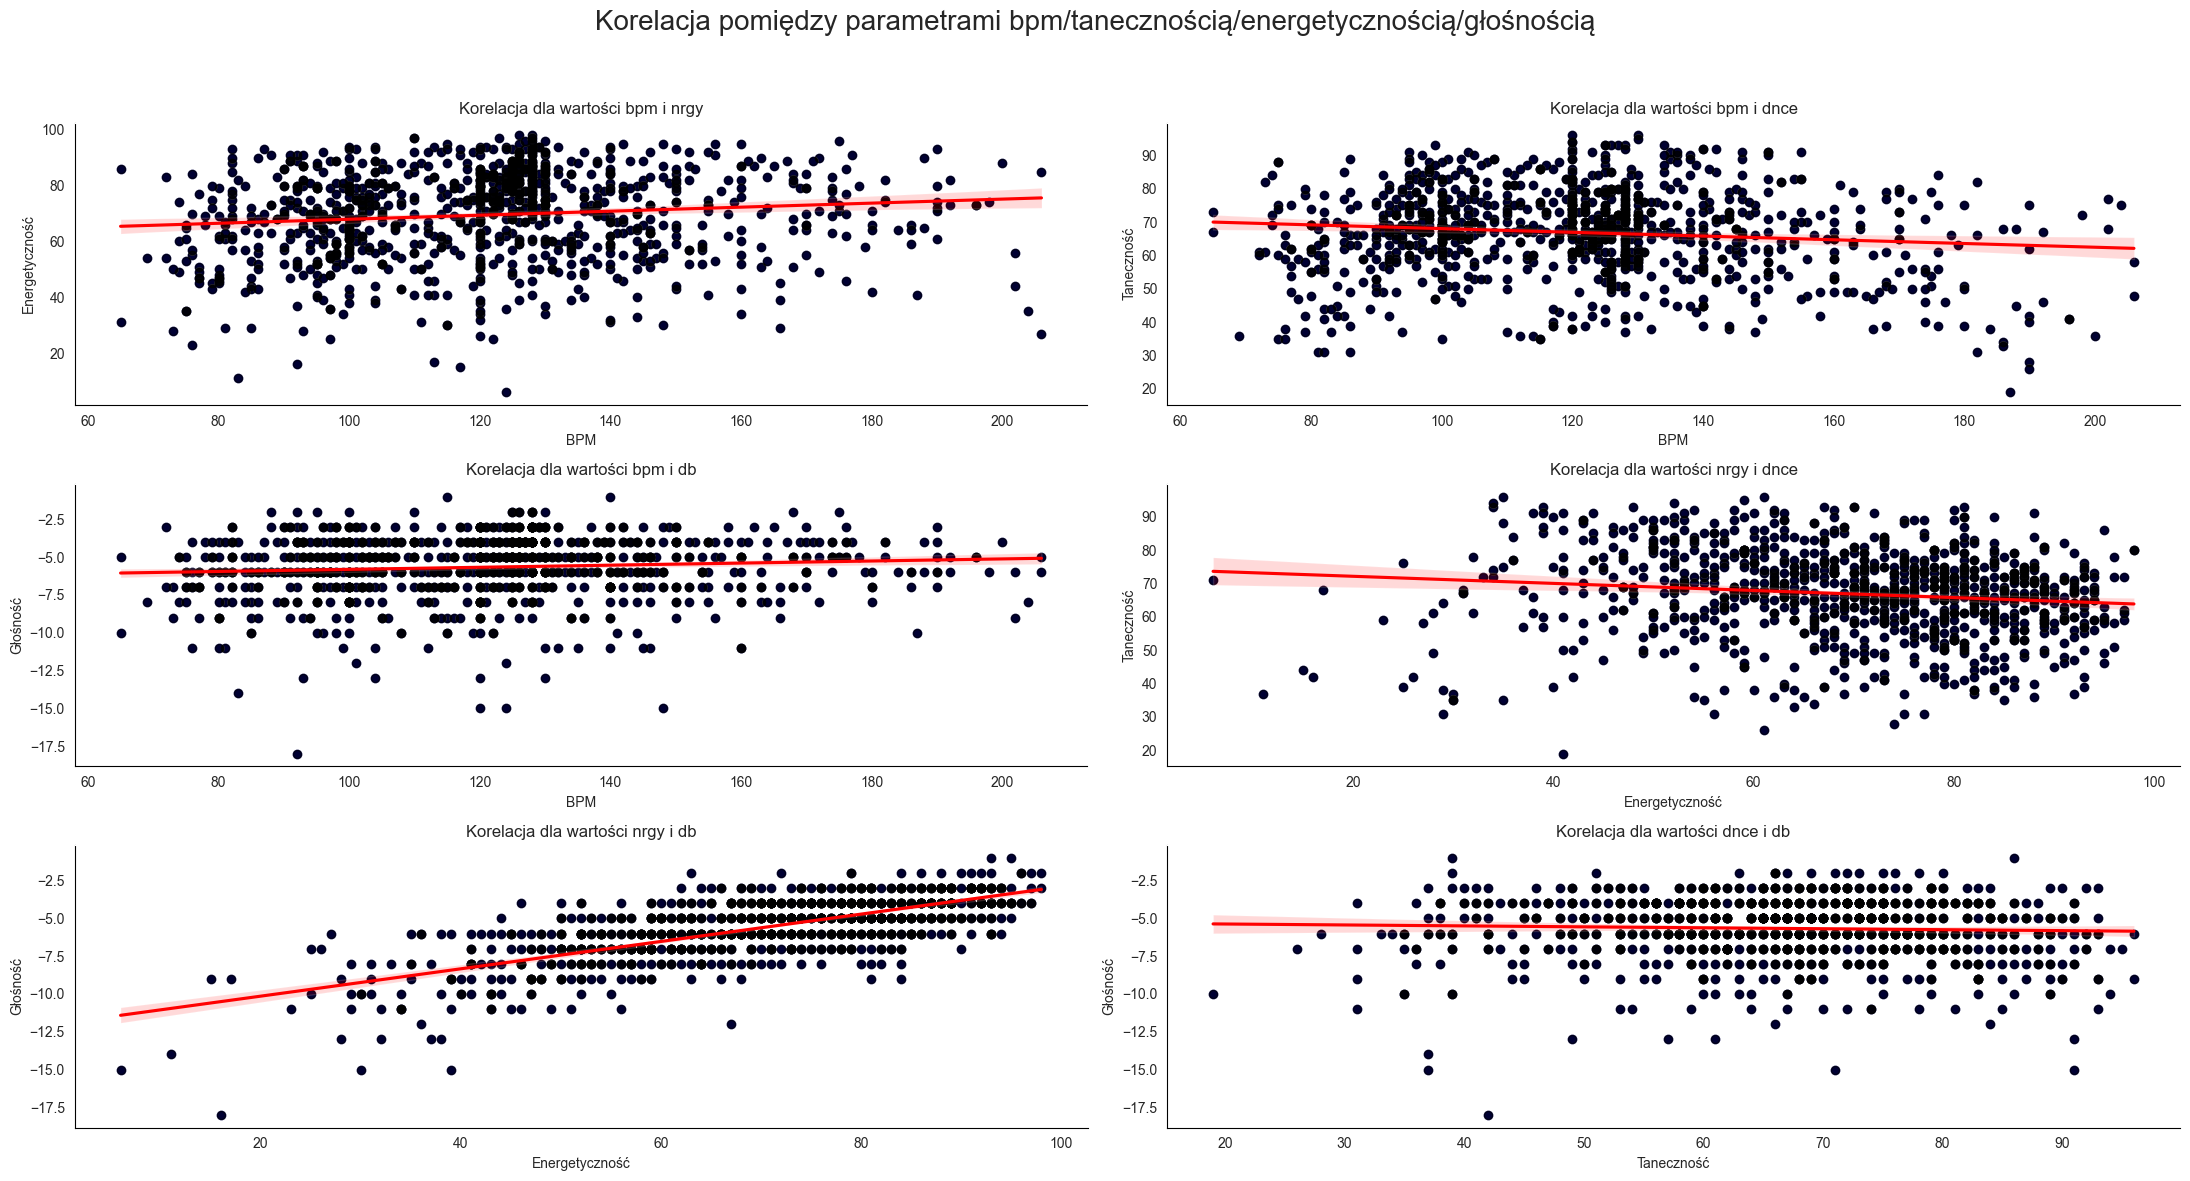

In [217]:
pairs_of_data =[("bpm","nrgy"), ("bpm","dnce"), ("bpm", "dB"), ("nrgy", "dnce"), ("nrgy", "dB"), ("dnce", "dB")]

dict_of_names = {
   "bpm": 'BPM',
   "nrgy": "Energetyczność",
   "dnce": "Taneczność",
   "dB": "Głośność" 
}

# Tworzenie siatki subplotów 2x3
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 12))

fig.suptitle(f'Korelacja pomiędzy parametrami bpm/tanecznością/energetycznością/głośnością\n\n', fontsize=20)
# Iteracja po każdym elemencie siatki subplotów
for idx, ax in enumerate(axes.flatten()):

    # Wybieranie kolumny zainteresowania
    feature_col = pairs_of_data[idx]
    
    sns.scatterplot(data = df,
                x = feature_col[0],
                y =feature_col[1],
                s = 50,
                color='blue', ax=ax ); 

    
    sns.regplot(data=df, y=feature_col[1], x=feature_col[0], ax=ax, scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title=f'Korelacja dla wartości {feature_col[0].lower()} i {feature_col[1].lower()}')
    ax.set_xlabel(f'{dict_of_names[feature_col[0]]}')
    ax.set_ylabel(f"{dict_of_names[feature_col[1]]}")
    ax.set_facecolor('white')

    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

    
# Wyświetlenie wykresu
plt.tight_layout()
plt.show()